In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import geopandas as gpd

In [ ]:
# Shapefile 읽기
shapefile_path = '/content/drive/MyDrive/유성구 데이터/법정동인구수경계/bnd_oa_25040_2023_2Q.shp'
gdf = gpd.read_file(shapefile_path)

# 좌표계 확인
print(gdf.crs)

# 좌표계가 EPSG:4326이 아니라면 변환
if gdf.crs != 'EPSG:4326':
    gdf = gdf.to_crs('EPSG:4326')

PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 2000",DATUM["Geocentric_datum_of_Korea",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4737"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5179"]]


In [ ]:
gusung_gdf = gdf[gdf['ADM_CD']=='25040540']

In [ ]:
gusung_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)

<ipython-input-17-b18d8564b841>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gusung_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)


In [ ]:
gusung_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 89 entries, 5 to 733
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BASE_DATE  89 non-null     object  
 1   ADM_CD     89 non-null     object  
 2   집계구번호      89 non-null     object  
 3   geometry   89 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 3.5+ KB


In [ ]:
gusung_gdf['집계구번호'] = gusung_gdf['집계구번호'].astype(int)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
gusung_df = pd.read_excel('/content/drive/MyDrive/유성구 데이터/구성동_인구수.xls')
gusung_df

,순위,항목,집계구번호,값,비율(%)
0,1,온천2동_1,25040540090018,4322,8.8
1,2,온천2동_2,25040540090009,3440,7.0
2,3,온천2동_3,25040540020001,695,1.4
3,4,온천2동_4,25040540040001,677,1.4
4,5,온천2동_5,25040540080301,656,1.3
...,...,...,...,...,...
84,85,온천2동_85,25040540080102,323,0.7
85,86,온천2동_86,25040540030101,319,0.6
86,87,온천2동_87,25040540090015,306,0.6
87,88,온천2동_88,25040540080004,304,0.6


In [ ]:
gusung_df['집계구번호'].fillna(0, inplace=True)
gusung_df['집계구번호'] = gusung_df['집계구번호'].astype(int)
gusung_df

,순위,항목,집계구번호,값,비율(%)
0,1,온천2동_1,25040540090018,4322,8.8
1,2,온천2동_2,25040540090009,3440,7.0
2,3,온천2동_3,25040540020001,695,1.4
3,4,온천2동_4,25040540040001,677,1.4
4,5,온천2동_5,25040540080301,656,1.3
...,...,...,...,...,...
84,85,온천2동_85,25040540080102,323,0.7
85,86,온천2동_86,25040540030101,319,0.6
86,87,온천2동_87,25040540090015,306,0.6
87,88,온천2동_88,25040540080004,304,0.6


In [ ]:
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
gusung_df = gusung_df.sort_values('집계구번호')
gusung_df

,순위,항목,집계구번호,값,비율(%)
79,80,온천2동_80,25040540010001,358,0.7
2,3,온천2동_3,25040540020001,695,1.4
72,73,온천2동_73,25040540030001,400,0.8
68,69,온천2동_69,25040540030002,415,0.8
24,25,온천2동_25,25040540030003,528,1.1
...,...,...,...,...,...
32,33,온천2동_33,25040540090513,506,1.0
49,50,온천2동_50,25040540090514,464,0.9
34,35,온천2동_35,25040540090515,499,1.0
54,55,온천2동_55,25040540090516,447,0.9


In [ ]:
gusung_gdf = gusung_gdf.sort_values('집계구번호')
gusung_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry
14,20230701,25040540,25040540010001,"POLYGON ((127.33125 36.36781, 127.33122 36.367..."
18,20230701,25040540,25040540020001,"POLYGON ((127.35234 36.35989, 127.35182 36.359..."
26,20230701,25040540,25040540030001,"POLYGON ((127.33472 36.36455, 127.33477 36.364..."
25,20230701,25040540,25040540030002,"POLYGON ((127.33405 36.36070, 127.33410 36.360..."
23,20230701,25040540,25040540030003,"POLYGON ((127.33524 36.36154, 127.33518 36.361..."
...,...,...,...,...
73,20230701,25040540,25040540090513,"POLYGON ((127.35405 36.36336, 127.35304 36.363..."
98,20230701,25040540,25040540090514,"POLYGON ((127.35430 36.36242, 127.35420 36.362..."
93,20230701,25040540,25040540090515,"POLYGON ((127.35754 36.36599, 127.35659 36.365..."
83,20230701,25040540,25040540090516,"POLYGON ((127.35589 36.36548, 127.35511 36.365..."


In [ ]:
gusung_gdf['집계구번호'].info()

<class 'pandas.core.series.Series'>
Index: 89 entries, 14 to 82
Series name: 집계구번호
Non-Null Count  Dtype
--------------  -----
89 non-null     int64
dtypes: int64(1)
memory usage: 3.4 KB


In [ ]:
# '집계구번호' 열을 기준으로 병합
gusung_new_gdf = gusung_gdf.merge(gusung_df[['집계구번호', '값', '비율(%)']], on='집계구번호', how='left')
gusung_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%)
0,20230701,25040540,25040540010001,"POLYGON ((127.33125 36.36781, 127.33122 36.367...",358,0.7
1,20230701,25040540,25040540020001,"POLYGON ((127.35234 36.35989, 127.35182 36.359...",695,1.4
2,20230701,25040540,25040540030001,"POLYGON ((127.33472 36.36455, 127.33477 36.364...",400,0.8
3,20230701,25040540,25040540030002,"POLYGON ((127.33405 36.36070, 127.33410 36.360...",415,0.8
4,20230701,25040540,25040540030003,"POLYGON ((127.33524 36.36154, 127.33518 36.361...",528,1.1
...,...,...,...,...,...,...
84,20230701,25040540,25040540090513,"POLYGON ((127.35405 36.36336, 127.35304 36.363...",506,1.0
85,20230701,25040540,25040540090514,"POLYGON ((127.35430 36.36242, 127.35420 36.362...",464,0.9
86,20230701,25040540,25040540090515,"POLYGON ((127.35754 36.36599, 127.35659 36.365...",499,1.0
87,20230701,25040540,25040540090516,"POLYGON ((127.35589 36.36548, 127.35511 36.365...",447,0.9


In [ ]:
gusung_new_gdf['일별쓰레기배출량'] = gusung_new_gdf['값'] * 0.93
gusung_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040540,25040540010001,"POLYGON ((127.33125 36.36781, 127.33122 36.367...",358,0.7,332.94
1,20230701,25040540,25040540020001,"POLYGON ((127.35234 36.35989, 127.35182 36.359...",695,1.4,646.35
2,20230701,25040540,25040540030001,"POLYGON ((127.33472 36.36455, 127.33477 36.364...",400,0.8,372.00
3,20230701,25040540,25040540030002,"POLYGON ((127.33405 36.36070, 127.33410 36.360...",415,0.8,385.95
4,20230701,25040540,25040540030003,"POLYGON ((127.33524 36.36154, 127.33518 36.361...",528,1.1,491.04
...,...,...,...,...,...,...,...
84,20230701,25040540,25040540090513,"POLYGON ((127.35405 36.36336, 127.35304 36.363...",506,1.0,470.58
85,20230701,25040540,25040540090514,"POLYGON ((127.35430 36.36242, 127.35420 36.362...",464,0.9,431.52
86,20230701,25040540,25040540090515,"POLYGON ((127.35754 36.36599, 127.35659 36.365...",499,1.0,464.07
87,20230701,25040540,25040540090516,"POLYGON ((127.35589 36.36548, 127.35511 36.365...",447,0.9,415.71


In [ ]:
gusung_new_gdf['일별쓰레기배출량'].fillna(0, inplace=True)
gusung_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040540,25040540010001,"POLYGON ((127.33125 36.36781, 127.33122 36.367...",358,0.7,332.94
1,20230701,25040540,25040540020001,"POLYGON ((127.35234 36.35989, 127.35182 36.359...",695,1.4,646.35
2,20230701,25040540,25040540030001,"POLYGON ((127.33472 36.36455, 127.33477 36.364...",400,0.8,372.00
3,20230701,25040540,25040540030002,"POLYGON ((127.33405 36.36070, 127.33410 36.360...",415,0.8,385.95
4,20230701,25040540,25040540030003,"POLYGON ((127.33524 36.36154, 127.33518 36.361...",528,1.1,491.04
...,...,...,...,...,...,...,...
84,20230701,25040540,25040540090513,"POLYGON ((127.35405 36.36336, 127.35304 36.363...",506,1.0,470.58
85,20230701,25040540,25040540090514,"POLYGON ((127.35430 36.36242, 127.35420 36.362...",464,0.9,431.52
86,20230701,25040540,25040540090515,"POLYGON ((127.35754 36.36599, 127.35659 36.365...",499,1.0,464.07
87,20230701,25040540,25040540090516,"POLYGON ((127.35589 36.36548, 127.35511 36.365...",447,0.9,415.71


In [ ]:
# 문자열 리스트 생성
code_list1 = [
    "90013", "90018", "90004"
]

new_codes1 = []
for code in code_list1:
  new_code = int("250405400" + code)
  new_codes1.append(new_code)

print(new_codes1)

[25040540090013, 25040540090018, 25040540090004]


In [ ]:
gusung_new_gdf = gusung_new_gdf[gusung_new_gdf['집계구번호'].isin(new_codes1)]
gusung_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
56,20230701,25040540,25040540090004,"POLYGON ((127.36708 36.36492, 127.36704 36.364...",301,0.6,279.93
64,20230701,25040540,25040540090013,"POLYGON ((127.35608 36.38025, 127.35609 36.380...",384,0.8,357.12
69,20230701,25040540,25040540090018,"POLYGON ((127.35793 36.37588, 127.35811 36.375...",4322,8.8,4019.46


In [ ]:
import folium
from folium import Choropleth, LayerControl, GeoJson
import pandas as pd
import geopandas as gpd

# 법정동별 상권 수 집계

# 지도 중심부 설정 (대전 유성구)
center = [36.3668, 127.3451]

# 기본 지도 생성
m = folium.Map(location=center, zoom_start=12, tiles='CartoDB positron')

# Choropleth 레이어 추가
Choropleth(
    geo_data=gusung_new_gdf.to_json(),
    data=gusung_new_gdf,
    columns=['집계구번호', '일별쓰레기배출량'],
    key_on='feature.properties.집계구번호',
    fill_color='Greens',
    fill_opacity=0.4,
    line_opacity=0.5,
    legend_name='값',

).add_to(m)

# 레이어 컨트롤 추가
LayerControl().add_to(m)

# 지도 저장 및 출력
m.save('/content/drive/MyDrive/시각화파일/html법정동별 지도/gusung_block.html')
m

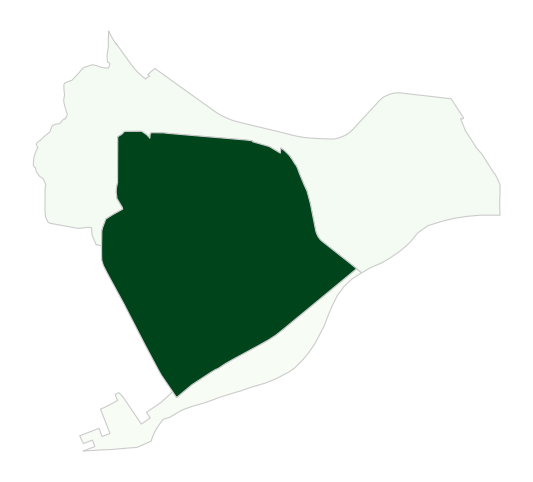

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

variable = '일별쓰레기배출량'

# 범위 설정
vmin, vmax = gusung_new_gdf[variable].min(), gusung_new_gdf[variable].max()

# Plot 생성
fig, ax = plt.subplots(1, figsize=(10, 6))

# GeoDataFrame을 시각화, legend=False로 기본 범례 제거
gusung_new_gdf.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, alpha=1)

# 축 제거
ax.axis('off')

# 지도 저장
plt.savefig("/content/drive/MyDrive/시각화파일/gusung_block.png", dpi=800, bbox_inches='tight', pad_inches=0)

# 지도 출력
plt.show()